In [1]:
from pathlib import Path
from metadata import ImageDataset, patient
import utils
import numpy as np
import pandas as pd

In [2]:
notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'The current directory is: {notebooks_path}')

The current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MISA/final_project/MISA_FINAL_PROJECT/notebooks


# MAIN

In [5]:
#we will compute the boxplot for the following models
model_list = ['TModel_dice_Validation', 'most_similar_dice', 'mean_atlas_dice', 'weighted_labels_dice', 'top_atlases_dice', 'bayesian_dice', 'unet_dice']
#we first concatenate all the csv files in a single dataframe
general_df = None
for model in model_list:
    #read csv file
    df = pd.read_csv(repo_path /'data' / 'results' / f'{model}.csv')
    #drop all columns except id_val and the tissue
    df = df.drop(columns=[col for col in df.columns if col not in ['id_val', 'CSF', 'GM', 'WM']])
    #we add a column with the model name
    df['model'] = model
    #concatenate df in general_df
    general_df = pd.concat([general_df, df], axis=0)

#remove 'dice' string from the model column
general_df['model'] = general_df['model'].str.replace('_dice', '')
general_df


,id_val,CSF,GM,WM,model
0,11,0.204935,0.884896,0.906621,TModel_Validation
1,12,0.150694,0.888044,0.878158,TModel_Validation
2,13,0.008494,0.888521,0.862049,TModel_Validation
3,14,0.006742,0.893843,0.894984,TModel_Validation
4,17,0.006448,0.900539,0.886184,TModel_Validation
0,11,0.780164,0.808732,0.838712,most_similar
1,12,0.768067,0.816139,0.806459,most_similar
2,13,0.772739,0.856228,0.794018,most_similar
3,14,0.757454,0.839375,0.801695,most_similar
4,17,0.835951,0.835665,0.787734,most_similar


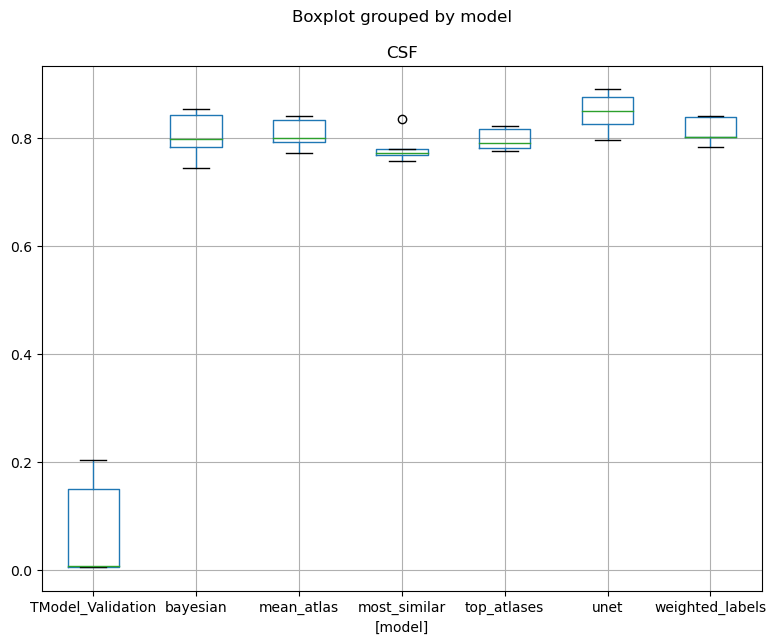

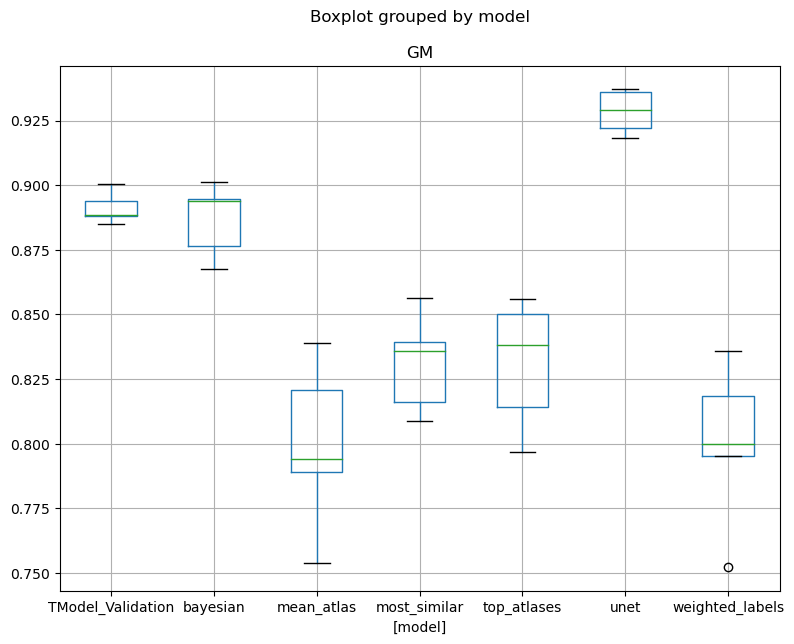

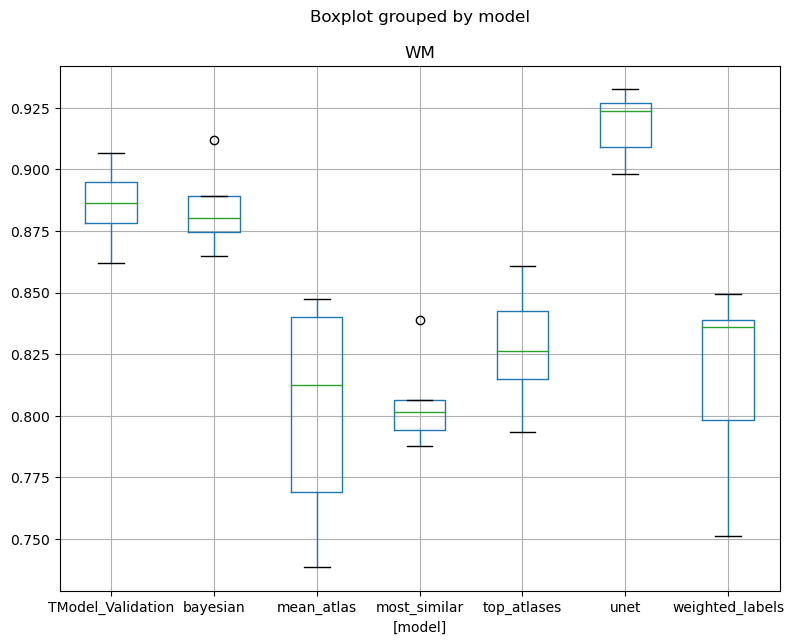

In [6]:
group = 'model'
#we now compute the boxplot for each tissue
for tissue in ['CSF', 'GM', 'WM']:
    #we select the tissue
    df_tissue = general_df[[tissue, group]]
    #now we compute the boxplot
    df_tissue.boxplot(by=group, figsize=(9, 7))